In [1]:
#load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import glob
from pathlib import Path
import seaborn as sns
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
from scipy.stats import boxcox

In [2]:
# Path
Path = "C:\\Users\\eszczepalink\\Downloads\\Indices/"

In [3]:
# use glob to read csvs
glob.glob(Path+ "/*.csv")

['C:\\Users\\eszczepalink\\Downloads\\Indices\\DJI - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Indices\\INX - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Indices\\IXIC - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Indices\\RUT 2k - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\Indices\\RUT 3K - Sheet1.csv']

In [4]:
# Import data and rename Close columns
DJI_DF = pd.read_csv(Path+"DJI - Sheet1.csv", 
            parse_dates = ["Date"],
           index_col = "Date").rename(columns={"Close":"DJI_Close"})
SP_DF = pd.read_csv(Path+"INX - Sheet1.csv",
            parse_dates = ["Date"],
            index_col= "Date").rename(columns={"Close":"SP_Close"})
NQ_DF = pd.read_csv(Path+"IXIC - Sheet1.csv",
            parse_dates = ["Date"],
            index_col = "Date").rename(columns={"Close":"NQ_Close"})
RUT2K = pd.read_csv(Path+"RUT 2k - Sheet1.csv",
            parse_dates= ["Date"],
            index_col= "Date").rename(columns={"Close":"RUT2K_Close"})
RUT3K = pd.read_csv(Path+"RUT 3k - Sheet1.csv",
            parse_dates= ["Date"],
            index_col= "Date").rename(columns={"Close":"RUT3K_Close"})


In [5]:
# Concatenating DF's into volatility df
volatility_df = pd.concat([DJI_DF,SP_DF,NQ_DF,RUT2K,RUT3K], axis=1)

In [6]:
# check missing value 
volatility_df.isnull().sum()

DJI_Close      18
SP_Close        4
NQ_Close       11
RUT2K_Close    20
RUT3K_Close    20
dtype: int64

In [7]:
# fill missing value 
volatility_df.fillna(np.nan,inplace=True)

In [8]:
volatility_df

DJI_Close  SP_Close  NQ_Close  RUT2K_Close  RUT3K_Close
Date                                                                        
2010-09-28 16:00:00   10858.14   1147.70   2379.59       675.43       675.43
2010-09-29 16:00:00   10835.28   1144.73   2376.56       677.64       677.64
2010-09-30 16:00:00   10788.05   1141.20   2368.62       676.14       676.14
2010-10-01 16:00:00   10829.70   1146.24   2370.75       679.29       679.29
2010-10-04 16:00:00   10751.27   1137.03   2344.52       669.45       669.45
...                        ...       ...       ...          ...          ...
2022-09-19 16:00:00   31019.68   3899.89  11535.02      1812.84      1812.84
2022-09-20 16:00:00   30706.23   3855.93  11425.05      1787.50      1787.50
2022-09-21 16:00:00   30183.78   3789.93  11220.19      1762.16      1762.16
2022-09-22 16:00:00   30076.68   3757.99  11066.81      1722.31      1722.31
2022-09-23 16:00:00   29590.41   3693.23  10867.93      1679.59      1679.59

[3030 rows x 5 columns]

<AxesSubplot:title={'center':'DJI_Close/SP_Close/NQ_Close/VCR/RUT3K_Close'}, xlabel='Date'>

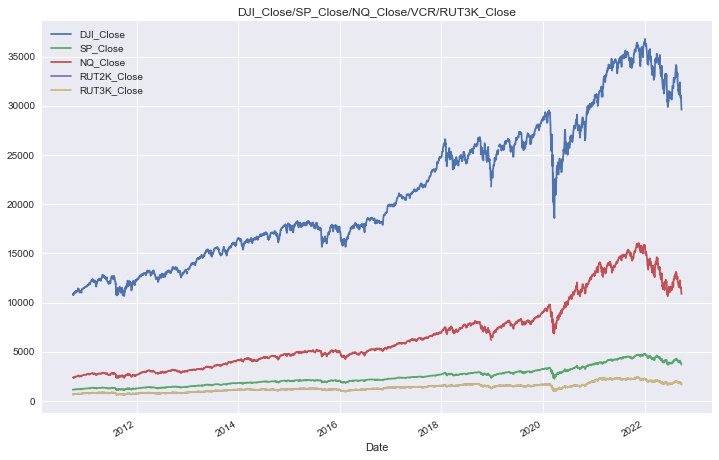

In [9]:
volatility_df.plot(figsize=(12, 8), title="DJI_Close/SP_Close/NQ_Close/VCR/RUT3K_Close")

In [10]:
volatility_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3030 entries, 2010-09-28 16:00:00 to 2022-09-23 16:00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DJI_Close    3012 non-null   float64
 1   SP_Close     3026 non-null   float64
 2   NQ_Close     3019 non-null   float64
 3   RUT2K_Close  3010 non-null   float64
 4   RUT3K_Close  3010 non-null   float64
dtypes: float64(5)
memory usage: 142.0 KB


<AxesSubplot:ylabel='Density'>

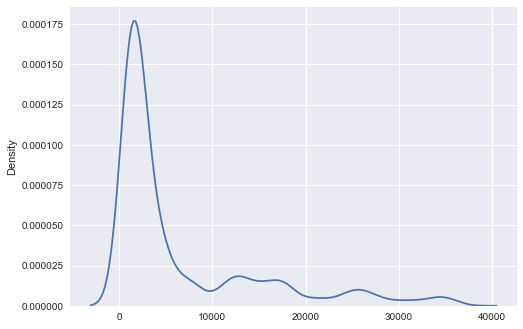

In [11]:
sns.distplot(volatility_df, hist=False, kde=True)

In [12]:
data_log = np.log(volatility_df)

In [13]:
data_log

DJI_Close  SP_Close  NQ_Close  RUT2K_Close  RUT3K_Close
Date                                                                        
2010-09-28 16:00:00   9.292670  7.045515  7.774683     6.515350     6.515350
2010-09-29 16:00:00   9.290563  7.042924  7.773409     6.518616     6.518616
2010-09-30 16:00:00   9.286194  7.039836  7.770063     6.516400     6.516400
2010-10-01 16:00:00   9.290048  7.044242  7.770962     6.521048     6.521048
2010-10-04 16:00:00   9.282779  7.036175  7.759836     6.506456     6.506456
...                        ...       ...       ...          ...          ...
2022-09-19 16:00:00  10.342377  8.268704  9.353143     7.502650     7.502650
2022-09-20 16:00:00  10.332221  8.257368  9.343564     7.488573     7.488573
2022-09-21 16:00:00  10.315060  8.240103  9.325470     7.474296     7.474296
2022-09-22 16:00:00  10.311505  8.231640  9.311706     7.451422     7.451422
2022-09-23 16:00:00  10.295206  8.214257  9.293572     7.426305     7.426305

[3030 rows x 5 columns]

<AxesSubplot:ylabel='Density'>

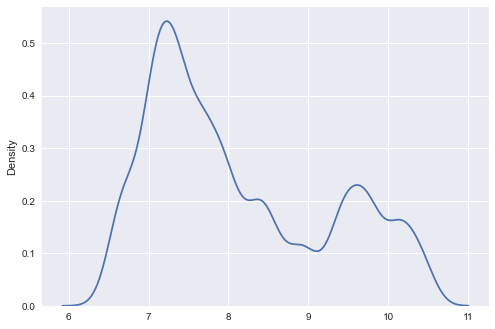

In [14]:
sns.distplot(data_log, hist=False, kde=True)

In [15]:
# Creating Dialy Returns
volatility_df["return_DJI"] = volatility_df["DJI_Close"].pct_change()
volatility_df["return_SP"] = volatility_df["SP_Close"].pct_change()
volatility_df["return_NQ"] = volatility_df["NQ_Close"].pct_change()
volatility_df["return_RUT2K"] = volatility_df["RUT2K_Close"].pct_change()
volatility_df["return_RUT3K"] = volatility_df["RUT3K_Close"].pct_change()

In [16]:
volatility_df

DJI_Close  SP_Close  NQ_Close  RUT2K_Close  RUT3K_Close  \
Date                                                                           
2010-09-28 16:00:00   10858.14   1147.70   2379.59       675.43       675.43   
2010-09-29 16:00:00   10835.28   1144.73   2376.56       677.64       677.64   
2010-09-30 16:00:00   10788.05   1141.20   2368.62       676.14       676.14   
2010-10-01 16:00:00   10829.70   1146.24   2370.75       679.29       679.29   
2010-10-04 16:00:00   10751.27   1137.03   2344.52       669.45       669.45   
...                        ...       ...       ...          ...          ...   
2022-09-19 16:00:00   31019.68   3899.89  11535.02      1812.84      1812.84   
2022-09-20 16:00:00   30706.23   3855.93  11425.05      1787.50      1787.50   
2022-09-21 16:00:00   30183.78   3789.93  11220.19      1762.16      1762.16   
2022-09-22 16:00:00   30076.68   3757.99  11066.81      1722.31      1722.31   
2022-09-23 16:00:00   29590.41   3693.23  10867.93      1679.59      1679.59   

                     return_DJI  return_SP  return_NQ  return_RUT2K  \
Date                                                                  
2010-09-28 16:00:00         NaN        NaN        NaN           NaN   
2010-09-29 16:00:00   -0.002105  -0.002588  -0.001273      0.003272   
2010-09-30 16:00:00   -0.004359  -0.003084  -0.003341     -0.002214   
2010-10-01 16:00:00    0.003861   0.004416   0.000899      0.004659   
2010-10-04 16:00:00   -0.007242  -0.008035  -0.011064     -0.014486   
...                         ...        ...        ...           ...   
2022-09-19 16:00:00    0.006400   0.006857   0.007566      0.008147   
2022-09-20 16:00:00   -0.010105  -0.011272  -0.009534     -0.013978   
2022-09-21 16:00:00   -0.017014  -0.017116  -0.017931     -0.014176   
2022-09-22 16:00:00   -0.003548  -0.008428  -0.013670     -0.022614   
2022-09-23 16:00:00   -0.016168  -0.017233  -0.017971     -0.024804   

                     return_RUT3K  
Date                               
2010-09-28 16:00:00           NaN  
2010-09-29 16:00:00      0.003272  
2010-09-30 16:00:00     -0.002214  
2010-10-01 16:00:00      0.004659  
2010-10-04 16:00:00     -0.014486  
...                           ...  
2022-09-19 16:00:00      0.008147  
2022-09-20 16:00:00     -0.013978  
2022-09-21 16:00:00     -0.014176  
2022-09-22 16:00:00     -0.022614  
2022-09-23 16:00:00     -0.024804  

[3030 rows x 10 columns]

In [17]:
# Drop NA's
volatility_df.dropna(inplace=True)

<AxesSubplot:ylabel='Density'>

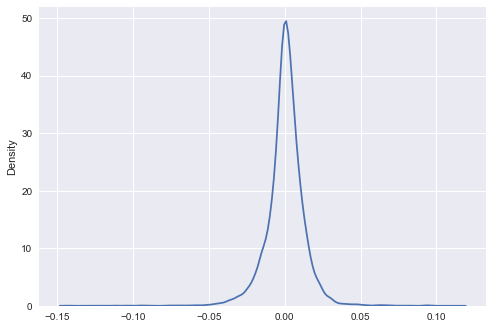

In [18]:
# display returns
sns.distplot(volatility_df[['return_DJI','return_SP','return_NQ','return_RUT2K','return_RUT3K']], 
                             hist=False, kde=True)


In [19]:
# Calculating rolling std for 5-day window
volatility_df["std_DJI"] = volatility_df["return_DJI"].rolling(window=5).std()
volatility_df["std_SP"] = volatility_df["return_SP"].rolling(window=5).std()
volatility_df["std_NQ"] = volatility_df["return_NQ"].rolling(window=5).std()
volatility_df["std_RUT2K"] = volatility_df["return_RUT2K"].rolling(window=5).std()
volatility_df["std_RUT3K"] = volatility_df["return_RUT3K"].rolling(window=5).std()

In [20]:
# Drop na's
volatility_df.dropna(inplace=True)

In [21]:
# data frame
display(volatility_df.head(2))
display(volatility_df.tail(2))

DJI_Close  SP_Close  NQ_Close  RUT2K_Close  RUT3K_Close  \
Date                                                                           
2010-10-05 16:00:00   10944.72   1160.75   2399.83       689.35       689.35   
2010-10-06 16:00:00   10967.65   1159.97   2373.81       685.33       685.33   

                     return_DJI  return_SP  return_NQ  return_RUT2K  \
Date                                                                  
2010-10-05 16:00:00    0.017993   0.020861   0.023591      0.029726   
2010-10-06 16:00:00    0.002095  -0.000672  -0.010842     -0.005832   

                     return_RUT3K   std_DJI    std_SP    std_NQ  std_RUT2K  \
Date                                                                         
2010-10-05 16:00:00      0.029726  0.010016  0.011277  0.013010   0.016147   
2010-10-06 16:00:00     -0.005832  0.009798  0.011100  0.014216   0.016778   

                     std_RUT3K  
Date                            
2010-10-05 16:00:00   0.016147  
2010-10-06 16:00:00   0.016778

DJI_Close  SP_Close  NQ_Close  RUT2K_Close  RUT3K_Close  \
Date                                                                           
2022-09-22 16:00:00   30076.68   3757.99  11066.81      1722.31      1722.31   
2022-09-23 16:00:00   29590.41   3693.23  10867.93      1679.59      1679.59   

                     return_DJI  return_SP  return_NQ  return_RUT2K  \
Date                                                                  
2022-09-22 16:00:00   -0.003548  -0.008428  -0.013670     -0.022614   
2022-09-23 16:00:00   -0.016168  -0.017233  -0.017971     -0.024804   

                     return_RUT3K   std_DJI    std_SP    std_NQ  std_RUT2K  \
Date                                                                         
2022-09-22 16:00:00     -0.022614  0.008658  0.008857  0.009684   0.011552   
2022-09-23 16:00:00     -0.024804  0.009741  0.009870  0.010586   0.013040   

                     std_RUT3K  
Date                            
2022-09-22 16:00:00   0.011552  
2022-09-23 16:00:00   0.013040

In [22]:
cf.set_config_file(offline= True)

In [23]:
# plot volatility of indices
volatility_df[["std_DJI","std_SP","std_NQ","std_RUT2K","std_RUT3K"]].iplot(title="Volatility indices",
                                                                           xTitle="Time",
                                                                           yTitle="volatility",
                                                                           theme= "solar")

# ETFs Consumer Cyclical

In [24]:
# Path
Path = "C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Cyclical/"

In [25]:
# use glob to read many csvs
glob.glob(Path+ "/*.csv")

['C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Cyclical\\ITB - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Cyclical\\IYC - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Cyclical\\PEJ - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Cyclical\\VCR - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Cyclical\\XLY - Sheet1.csv']

In [26]:
# Import data and rename Close columns
ITB_DF = pd.read_csv(Path+"ITB - Sheet1.csv", 
            parse_dates = ["Date"],
           index_col = "Date").rename(columns={"Close":"ITB_Close"})
IYC_DF = pd.read_csv(Path+"IYC - Sheet1.csv",
            parse_dates = ["Date"],
            index_col= "Date").rename(columns={"Close":"IYC_Close"})
PEJ_DF = pd.read_csv(Path+"PEJ - Sheet1.csv",
            parse_dates = ["Date"],
            index_col = "Date").rename(columns={"Close":"PEJ_Close"})
VCR_DF = pd.read_csv(Path+"VCR - Sheet1.csv",
            parse_dates= ["Date"],
            index_col= "Date").rename(columns={"Close":"VCR_Close"})
XLY_DF = pd.read_csv(Path+"XLY - Sheet1.csv",
            parse_dates= ["Date"],
            index_col= "Date").rename(columns={"Close":"XLY_Close"})


In [27]:
# Concatenating DF's into ETF Consumer Cyclical df
ETF_Consumer_Cyclical_df = pd.concat([ITB_DF,IYC_DF,PEJ_DF,VCR_DF,XLY_DF], axis=1)

In [28]:
# check missing value
ETF_Consumer_Cyclical_df.isnull().sum()

ITB_Close    7
IYC_Close    5
PEJ_Close    5
VCR_Close    5
XLY_Close    5
dtype: int64

In [29]:
ETF_Consumer_Cyclical_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3024 entries, 2010-09-28 16:00:00 to 2022-09-23 16:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ITB_Close  3017 non-null   float64
 1   IYC_Close  3019 non-null   float64
 2   PEJ_Close  3019 non-null   float64
 3   VCR_Close  3019 non-null   float64
 4   XLY_Close  3019 non-null   float64
dtypes: float64(5)
memory usage: 141.8 KB


In [30]:
# fill missing value 
ETF_Consumer_Cyclical_df.fillna(np.nan,inplace=True)

<AxesSubplot:ylabel='Density'>

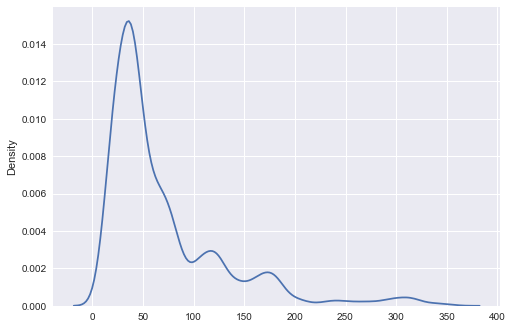

In [31]:
sns.distplot(ETF_Consumer_Cyclical_df, hist=False, kde=True)

<AxesSubplot:title={'center':'ITB/IYC/PEJ/VCR/XLY'}, xlabel='Date'>

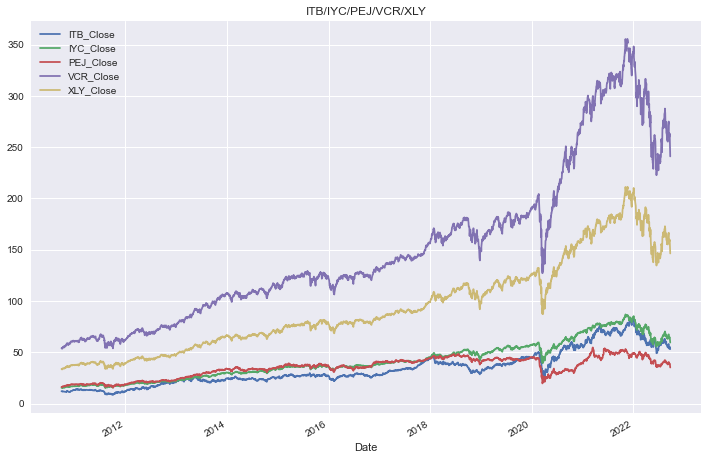

In [32]:
# closing prices 
ETF_Consumer_Cyclical_df.plot(figsize=(12, 8), title="ITB/IYC/PEJ/VCR/XLY")

In [33]:
# Creating Dialy Returns
ETF_Consumer_Cyclical_df["return_ITB"] = ETF_Consumer_Cyclical_df["ITB_Close"].pct_change()
ETF_Consumer_Cyclical_df["return_IYC"] = ETF_Consumer_Cyclical_df["IYC_Close"].pct_change()
ETF_Consumer_Cyclical_df["return_PEJ"] = ETF_Consumer_Cyclical_df["PEJ_Close"].pct_change()
ETF_Consumer_Cyclical_df["return_VCR"] = ETF_Consumer_Cyclical_df["VCR_Close"].pct_change()
ETF_Consumer_Cyclical_df["return_XLY"] = ETF_Consumer_Cyclical_df["XLY_Close"].pct_change()

In [34]:
# Drop NA's
ETF_Consumer_Cyclical_df.dropna(inplace=True)

<AxesSubplot:ylabel='Density'>

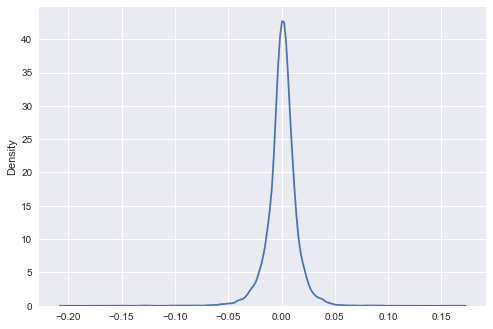

In [35]:
sns.distplot(ETF_Consumer_Cyclical_df[["return_ITB","return_IYC","return_PEJ","return_VCR","return_XLY"]], hist=False, kde=True)


In [36]:
# data frame
display(ETF_Consumer_Cyclical_df.head(2))
display(ETF_Consumer_Cyclical_df.tail(2))

ITB_Close  IYC_Close  PEJ_Close  VCR_Close  XLY_Close  \
Date                                                                         
2010-09-29 16:00:00      11.96      15.31      16.20      53.80      33.50   
2010-09-30 16:00:00      12.05      15.28      16.19      53.72      33.41   

                     return_ITB  return_IYC  return_PEJ  return_VCR  \
Date                                                                  
2010-09-29 16:00:00   -0.011570   -0.004551   -0.003077   -0.004809   
2010-09-30 16:00:00    0.007525   -0.001960   -0.000617   -0.001487   

                     return_XLY  
Date                             
2010-09-29 16:00:00   -0.007113  
2010-09-30 16:00:00   -0.002687

ITB_Close  IYC_Close  PEJ_Close  VCR_Close  XLY_Close  \
Date                                                                         
2022-09-22 16:00:00      53.09      60.85      36.13     246.48     149.87   
2022-09-23 16:00:00      53.17      59.55      35.25     241.06     146.42   

                     return_ITB  return_IYC  return_PEJ  return_VCR  \
Date                                                                  
2022-09-22 16:00:00   -0.012279   -0.023431   -0.028502   -0.024884   
2022-09-23 16:00:00    0.001507   -0.021364   -0.024356   -0.021990   

                     return_XLY  
Date                             
2022-09-22 16:00:00   -0.023075  
2022-09-23 16:00:00   -0.023020

In [37]:
# plot volatility of Consumer Cyclical ETFs 
ETF_Consumer_Cyclical_df[["return_ITB","return_IYC","return_PEJ","return_VCR","return_XLY"]].iplot(title="Consumer Cyclical ETFs returns",
                                                                           xTitle="Time",
                                                                           yTitle="returns",
                                                                           theme="solar")

# ETFs Consumer Defensive

In [38]:
# Path
Path = "C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Defensive/"

In [39]:
# use glob to read many csvs
glob.glob(Path+ "/*.csv")

['C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Defensive\\IYK - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Defensive\\KXI - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Defensive\\PBJ - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Defensive\\VDC - Sheet1.csv',
 'C:\\Users\\eszczepalink\\Downloads\\ETF_Consumer_Defensive\\XLP - Sheet1.csv']

In [40]:
# Import data and rename Close columns
IYK_DF = pd.read_csv(Path+"IYK - Sheet1.csv", 
            parse_dates = ["Date"],
           index_col = "Date").rename(columns={"Close":"IYK_Close"})
KXI_DF = pd.read_csv(Path+"KXI - Sheet1.csv",
            parse_dates = ["Date"],
            index_col= "Date").rename(columns={"Close":"KXI_Close"})
PBJ_DF = pd.read_csv(Path+"PBJ - Sheet1.csv",
            parse_dates = ["Date"],
            index_col = "Date").rename(columns={"Close":"PBJ_Close"})
VDC_DF = pd.read_csv(Path+"VDC - Sheet1.csv",
            parse_dates= ["Date"],
            index_col= "Date").rename(columns={"Close":"VDC_Close"})
XLP_DF = pd.read_csv(Path+"XLP - Sheet1.csv",
            parse_dates= ["Date"],
            index_col= "Date").rename(columns={"Close":"XLP_Close"})

In [41]:
# Concatenating DF's into ETF Consumer Cyclical df
ETF_Consumer_Defensive_df = pd.concat([IYK_DF,KXI_DF,PBJ_DF,VDC_DF,XLP_DF], axis=1)

In [42]:
ETF_Consumer_Defensive_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2010-09-28 16:00:00 to 2022-09-23 16:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IYK_Close  3019 non-null   float64
 1   KXI_Close  3019 non-null   float64
 2   PBJ_Close  3019 non-null   float64
 3   VDC_Close  3019 non-null   float64
 4   XLP_Close  3019 non-null   float64
dtypes: float64(5)
memory usage: 141.5 KB


In [43]:
# check missing value
ETF_Consumer_Defensive_df.isnull().sum()

IYK_Close    0
KXI_Close    0
PBJ_Close    0
VDC_Close    0
XLP_Close    0
dtype: int64

<AxesSubplot:ylabel='Density'>

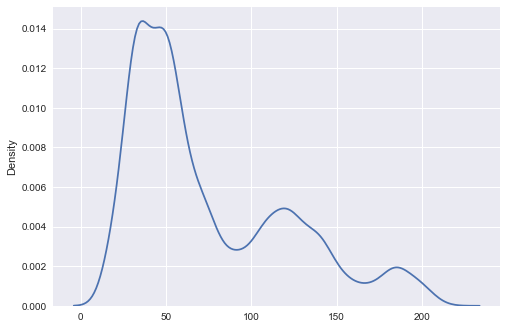

In [44]:
sns.distplot(ETF_Consumer_Defensive_df, hist=False, kde=True)

<AxesSubplot:title={'center':'IYK/KXI/PBJ/VDC/XLP'}, xlabel='Date'>

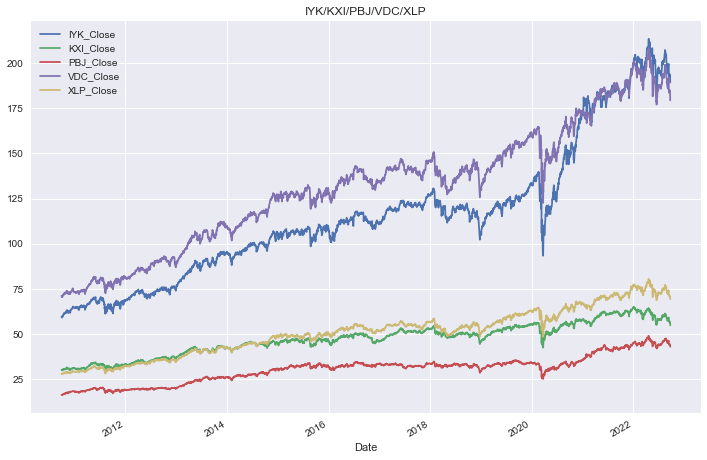

In [45]:
# plot closing prices 
ETF_Consumer_Defensive_df.plot(figsize=(12, 8), title="IYK/KXI/PBJ/VDC/XLP")

In [46]:
# Creating Dialy Returns
ETF_Consumer_Defensive_df["return_IYK"] = ETF_Consumer_Defensive_df["IYK_Close"].pct_change()
ETF_Consumer_Defensive_df["return_KXI"] = ETF_Consumer_Defensive_df["KXI_Close"].pct_change()
ETF_Consumer_Defensive_df["return_PBJ"] = ETF_Consumer_Defensive_df["PBJ_Close"].pct_change()
ETF_Consumer_Defensive_df["return_VDC"] = ETF_Consumer_Defensive_df["VDC_Close"].pct_change()
ETF_Consumer_Defensive_df["return_XLP"] = ETF_Consumer_Defensive_df["XLP_Close"].pct_change()

In [47]:
# Drop NA's
ETF_Consumer_Defensive_df.dropna(inplace=True)

In [48]:
# data frame
display(ETF_Consumer_Defensive_df.head(2))
display(ETF_Consumer_Defensive_df.tail(2))

IYK_Close  KXI_Close  PBJ_Close  VDC_Close  XLP_Close  \
Date                                                                         
2010-09-29 16:00:00      59.47      30.14      16.39      70.96      27.98   
2010-09-30 16:00:00      59.28      30.05      16.38      70.68      27.88   

                     return_IYK  return_KXI  return_PBJ  return_VDC  \
Date                                                                  
2010-09-29 16:00:00   -0.004520   -0.006919   -0.001827   -0.004070   
2010-09-30 16:00:00   -0.003195   -0.002986   -0.000610   -0.003946   

                     return_XLP  
Date                             
2010-09-29 16:00:00   -0.002851  
2010-09-30 16:00:00   -0.003574

IYK_Close  KXI_Close  PBJ_Close  VDC_Close  XLP_Close  \
Date                                                                         
2022-09-22 16:00:00     192.11      56.30      43.89     182.69      70.58   
2022-09-23 16:00:00     189.29      54.93      43.07     179.41      69.38   

                     return_IYK  return_KXI  return_PBJ  return_VDC  \
Date                                                                  
2022-09-22 16:00:00    0.000365    0.001423   -0.004988   -0.002893   
2022-09-23 16:00:00   -0.014679   -0.024334   -0.018683   -0.017954   

                     return_XLP  
Date                             
2022-09-22 16:00:00   -0.001415  
2022-09-23 16:00:00   -0.017002

<AxesSubplot:ylabel='Density'>

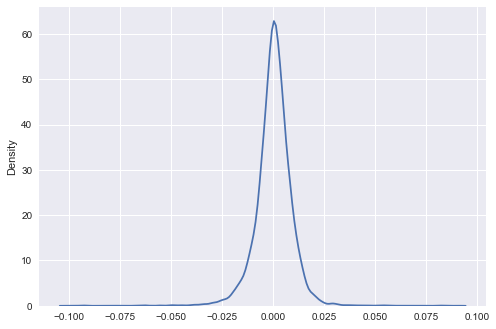

In [49]:
sns.distplot(ETF_Consumer_Defensive_df[["return_IYK","return_KXI","return_PBJ","return_VDC","return_XLP"]], 
             hist=False, 
             kde=True)

In [50]:
# plot volatility Consumer Defensive ETFs Volatility
ETF_Consumer_Defensive_df[["return_IYK","return_KXI","return_PBJ","return_VDC","return_XLP"]].iplot(title="Consumer Defensive ETFs returns",
                                                                           xTitle="Time",
                                                                           yTitle="returns",
                                                                           theme = "solar")

In [51]:
# data properties is variance and mean
# if variance changes a cross the time we call it non stationary then we fix it
# mean is average price 
# Arma and arima won't fix that so the Garch anable you to make prediction on volatilities

# Times Series with GARCH

In [52]:
from arch import arch_model
import scipy
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

# Check Stationarity for indixes

In [53]:
volatility_df.columns


Index(['DJI_Close', 'SP_Close', 'NQ_Close', 'RUT2K_Close', 'RUT3K_Close',
       'return_DJI', 'return_SP', 'return_NQ', 'return_RUT2K', 'return_RUT3K',
       'std_DJI', 'std_SP', 'std_NQ', 'std_RUT2K', 'std_RUT3K'],
      dtype='object')

In [54]:
# all the adf stats is lower than percentages so we approved stationarity
adfuller(volatility_df['return_DJI'])

(-11.870706899524086,
 6.51385527959509e-22,
 27,
 2965,
 {'1%': -3.4325574099218503,
  '5%': -2.8625152892235404,
  '10%': -2.5672891728115252},
 -18604.07217299622)

In [55]:
adfuller(volatility_df['return_NQ'])

(-11.617026274028971,
 2.434991245965568e-21,
 27,
 2965,
 {'1%': -3.4325574099218503,
  '5%': -2.8625152892235404,
  '10%': -2.5672891728115252},
 -17534.31713072597)

In [56]:
adfuller(volatility_df['return_SP'])

(-11.91679298820361,
 5.142233757383154e-22,
 27,
 2965,
 {'1%': -3.4325574099218503,
  '5%': -2.8625152892235404,
  '10%': -2.5672891728115252},
 -18467.784768788162)

In [57]:
adfuller(volatility_df['return_RUT2K'])

(-20.895471840435587,
 0.0,
 6,
 2986,
 {'1%': -3.432541872229122,
  '5%': -2.8625084268054724,
  '10%': -2.567285519331338},
 -16837.349176288066)

In [58]:
adfuller(volatility_df['return_RUT3K'])

(-20.895471840435587,
 0.0,
 6,
 2986,
 {'1%': -3.432541872229122,
  '5%': -2.8625084268054724,
  '10%': -2.567285519331338},
 -16837.349176288066)

# Check Stationarity for ETF_Consumer_Cyclical_df

In [59]:
ETF_Consumer_Cyclical_df.columns

Index(['ITB_Close', 'IYC_Close', 'PEJ_Close', 'VCR_Close', 'XLY_Close',
       'return_ITB', 'return_IYC', 'return_PEJ', 'return_VCR', 'return_XLY'],
      dtype='object')

In [60]:
adfuller(ETF_Consumer_Cyclical_df['return_ITB'])

(-10.859752984820492,
 1.4565431199953883e-19,
 23,
 2987,
 {'1%': -3.4325411377931645,
  '5%': -2.8625081024316796,
  '10%': -2.5672853466382444},
 -15398.684237846377)

In [61]:
adfuller(ETF_Consumer_Cyclical_df['return_IYC'])

(-18.278589214121396,
 2.311050023627876e-30,
 8,
 3002,
 {'1%': -3.432530180019896,
  '5%': -2.862503262770165,
  '10%': -2.5672827700564715},
 -18204.45331384198)

In [62]:
adfuller(ETF_Consumer_Cyclical_df['return_PEJ'])

(-10.68448605277316,
 3.8645563875751566e-19,
 28,
 2982,
 {'1%': -3.4325448149029985,
  '5%': -2.8625097264772665,
  '10%': -2.5672862112626573},
 -16717.295983589196)

In [63]:
adfuller(ETF_Consumer_Cyclical_df['return_VCR'])

(-18.010433800991844,
 2.7157062651262874e-30,
 8,
 3002,
 {'1%': -3.432530180019896,
  '5%': -2.862503262770165,
  '10%': -2.5672827700564715},
 -17651.56453815577)

In [64]:
adfuller(ETF_Consumer_Cyclical_df['return_XLY'])

(-18.27126863517605,
 2.3193122839745983e-30,
 8,
 3002,
 {'1%': -3.432530180019896,
  '5%': -2.862503262770165,
  '10%': -2.5672827700564715},
 -17755.895462875895)

# Check Stationarity for ETF_Consumer_Defensive_df

In [65]:
ETF_Consumer_Defensive_df.columns

Index(['IYK_Close', 'KXI_Close', 'PBJ_Close', 'VDC_Close', 'XLP_Close',
       'return_IYK', 'return_KXI', 'return_PBJ', 'return_VDC', 'return_XLP'],
      dtype='object')

In [66]:
adfuller(ETF_Consumer_Defensive_df['return_IYK'])

(-12.722136786456062,
 9.775476630990737e-24,
 25,
 2992,
 {'1%': -3.432537472983712,
  '5%': -2.8625064838167327,
  '10%': -2.5672844849053806},
 -19325.797536608778)

In [67]:
adfuller(ETF_Consumer_Defensive_df['return_KXI'])

(-11.927978850534773,
 4.856153722313232e-22,
 26,
 2991,
 {'1%': -3.4325382049645357,
  '5%': -2.8625068071065787,
  '10%': -2.5672846570213257},
 -19889.518777436642)

In [68]:
adfuller(ETF_Consumer_Defensive_df['return_PBJ'])

(-13.082056329435115,
 1.862079528929444e-24,
 25,
 2992,
 {'1%': -3.432537472983712,
  '5%': -2.8625064838167327,
  '10%': -2.5672844849053806},
 -19285.614107377674)

In [69]:
adfuller(ETF_Consumer_Defensive_df['return_VDC'])

(-12.359169021581017,
 5.597014100904767e-23,
 26,
 2991,
 {'1%': -3.4325382049645357,
  '5%': -2.8625068071065787,
  '10%': -2.5672846570213257},
 -19869.879621079373)

In [70]:
adfuller(ETF_Consumer_Defensive_df['return_XLP'])

(-12.285056335649019,
 8.060995223859474e-23,
 26,
 2991,
 {'1%': -3.4325382049645357,
  '5%': -2.8625068071065787,
  '10%': -2.5672846570213257},
 -19813.44406458643)

# Fit a Garch model () model since we assumed our data is stationary
# p = ?, q = ?

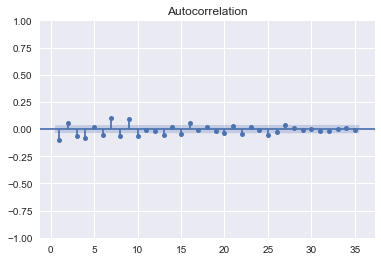

In [71]:
plot_acf(ETF_Consumer_Defensive_df['return_XLP'], zero=False, alpha=0.05)
plt.show()
# q = 1, 2, 3, 4

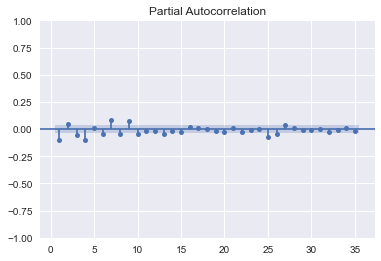

In [72]:
plot_pacf(ETF_Consumer_Defensive_df['return_XLP'], zero=False, alpha=0.05)
plt.show()
# p = 1, 2, 3, 4, 6, 7

In [73]:
class garch_1_1(object):
       
    def __init__(self, logReturns):
        self.logReturns = logReturns * 100
        self.sigma_2 = self.garch_filter(self.garch_optimization())
        self.coefficients = self.garch_optimization()
        
    def garch_filter(self, parameters):
        "Returns the variance expression of a GARCH(1,1) process."
        
        # Slicing the parameters list
        omega = parameters[0]
        alpha = parameters[1]
        beta = parameters[2]
        
        # Length of logReturns
        length = len(self.logReturns)
        
        # Initializing an empty array
        sigma_2 = np.zeros(length)
        
        # Filling the array, if i == 0 then uses the long term variance.
        for i in range(length):
            if i == 0:
                sigma_2[i] = omega / (1 - alpha - beta)
            else:
                sigma_2[i] = omega + alpha * self.logReturns[i-1]**2 + beta * sigma_2[i-1]
        
        return sigma_2 
        
    def garch_loglikehihood(self, parameters):
        "Defines the log likelihood sum to be optimized given the parameters."
        length = len(self.logReturns)
        
        sigma_2 = self.garch_filter(parameters)
        
        loglikelihood = - np.sum(-np.log(sigma_2) - self.logReturns**2 / sigma_2)
        
        return loglikelihood
    
    def garch_optimization(self):
        "Optimizes the log likelihood function and returns estimated coefficients"
        # Parameters initialization
        parameters = [.1, .05, .92]
        
        # Parameters optimization, scipy does not have a maximize function, so we minimize the opposite of the equation described earlier
        opt = scipy.optimize.minimize(self.garch_loglikehihood, parameters,
                                     bounds = ((.001,1),(.001,1),(.001,1)))
        
        variance = .01**2 * opt.x[0] / (1 - opt.x[1] - opt.x[2])   # Times .01**2 because it concerns squared returns
        
        return np.append(opt.x, variance)

In [74]:
# Concatenating DF's into volatility df
volatility_df = volatility_df[["DJI_Close","SP_Close","NQ_Close","RUT2K_Close","RUT3K_Close"]]
volatility_df

DJI_Close  SP_Close  NQ_Close  RUT2K_Close  RUT3K_Close
Date                                                                        
2010-10-05 16:00:00   10944.72   1160.75   2399.83       689.35       689.35
2010-10-06 16:00:00   10967.65   1159.97   2373.81       685.33       685.33
2010-10-07 16:00:00   10948.58   1158.06   2383.67       684.23       684.23
2010-10-08 16:00:00   11006.48   1165.15   2401.91       693.82       693.82
2010-10-11 16:00:00   11010.34   1165.32   2402.33       693.48       693.48
...                        ...       ...       ...          ...          ...
2022-09-19 16:00:00   31019.68   3899.89  11535.02      1812.84      1812.84
2022-09-20 16:00:00   30706.23   3855.93  11425.05      1787.50      1787.50
2022-09-21 16:00:00   30183.78   3789.93  11220.19      1762.16      1762.16
2022-09-22 16:00:00   30076.68   3757.99  11066.81      1722.31      1722.31
2022-09-23 16:00:00   29590.41   3693.23  10867.93      1679.59      1679.59

[2993 rows x 5 columns]

In [75]:
volatility_df.fillna(np.nan,inplace=True)

In [76]:
volatility_df['log_return_DJI'] = np.log(volatility_df["DJI_Close"]) - np.log(volatility_df["DJI_Close"].shift(1))
volatility_df['log_return_SP'] = np.log(volatility_df["SP_Close"]) - np.log(volatility_df["SP_Close"].shift(1))
volatility_df['log_return_NQ'] = np.log(volatility_df["NQ_Close"]) - np.log(volatility_df["NQ_Close"].shift(1))
volatility_df['log_return_RUT2K'] = np.log(volatility_df["RUT2K_Close"]) - np.log(volatility_df["RUT2K_Close"].shift(1))
volatility_df['log_return_RUT3K'] = np.log(volatility_df["RUT3K_Close"]) - np.log(volatility_df["RUT2K_Close"].shift(1))

In [77]:
volatility_df.dropna(inplace=True)

In [78]:
# Using code classes
modelDJI = garch_1_1(volatility_df['log_return_DJI'][1:])
modelSP = garch_1_1(volatility_df['log_return_SP'][1:])
modelNQ = garch_1_1(volatility_df['log_return_NQ'][1:])
modelRUT2K = garch_1_1(volatility_df['log_return_RUT2K'][1:])
modelRUT3K = garch_1_1(volatility_df['log_return_RUT3K'][1:])

In [79]:
# Fitting using the arch_model package
model_garch_DJI = arch_model(volatility_df['log_return_DJI'][1:] * 100, mean = 'Zero', vol = 'GARCH')
model_garch_DJI = model_garch_DJI.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 16911.626608636572
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6057.774400599206
Iteration:      3,   Func. Count:     21,   Neg. LLF: 6235.018676586369
Iteration:      4,   Func. Count:     27,   Neg. LLF: 3720.829960398574
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3680.9372524801674
Iteration:      6,   Func. Count:     36,   Neg. LLF: 3680.937096544082
Iteration:      7,   Func. Count:     39,   Neg. LLF: 3680.9370965452163
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3680.937096544082
            Iterations: 7
            Function evaluations: 39
            Gradient evaluations: 7


In [80]:
model_garch_DJI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:         log_return_DJI   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3680.94
Distribution:                  Normal   AIC:                           7367.87
Method:            Maximum Likelihood   BIC:                           7385.88
                                        No. Observations:                 2991
Date:                Mon, Sep 26 2022   Df Residuals:                     2991
Time:                        23:27:43   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0405  7.766e-03      5.217  1.819e-07 [2.529e-02,5.574e-02]
alpha[1]       0.1844  2.376e-02      7.762  8.384e-15     [  0.138,  0.231]
beta[1]        0.7770  2.359e-02     32.937 6.414e-238     [  0.731,  0.823]
============================================================================

Covariance estimator: robust
"""

In [81]:
model_garch_SP = arch_model(volatility_df['log_return_SP'][1:] * 100, mean = 'Zero', vol = 'GARCH')
model_garch_SP = model_garch_SP.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 16968.304606394224
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6089.026778262575
Iteration:      3,   Func. Count:     21,   Neg. LLF: 6506.546266881805
Iteration:      4,   Func. Count:     27,   Neg. LLF: 3975.317242556678
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3797.3465874479853
Iteration:      6,   Func. Count:     36,   Neg. LLF: 3797.343567601485
Iteration:      7,   Func. Count:     40,   Neg. LLF: 3797.343518719452
Iteration:      8,   Func. Count:     44,   Neg. LLF: 3797.3435179695507
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3797.3435179695507
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 8


In [82]:
model_garch_SP

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          log_return_SP   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3797.34
Distribution:                  Normal   AIC:                           7600.69
Method:            Maximum Likelihood   BIC:                           7618.70
                                        No. Observations:                 2991
Date:                Mon, Sep 26 2022   Df Residuals:                     2991
Time:                        23:27:43   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0425  8.930e-03      4.755  1.981e-06 [2.

In [83]:
model_garch_NQ = arch_model(volatility_df['log_return_NQ'][1:] * 100, mean = 'Zero', vol = 'GARCH')
model_garch_NQ = model_garch_NQ.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1669518177.287191
Iteration:      2,   Func. Count:     12,   Neg. LLF: 5895.265474704051
Iteration:      3,   Func. Count:     18,   Neg. LLF: 4842.425431021857
Iteration:      4,   Func. Count:     25,   Neg. LLF: 4413.07104150367
Iteration:      5,   Func. Count:     30,   Neg. LLF: 4410.649390066551
Iteration:      6,   Func. Count:     34,   Neg. LLF: 4410.647317717072
Iteration:      7,   Func. Count:     38,   Neg. LLF: 4410.647275133553
Iteration:      8,   Func. Count:     42,   Neg. LLF: 4410.647272901675
Iteration:      9,   Func. Count:     45,   Neg. LLF: 4410.64727290166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4410.647272901675
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9


In [84]:
model_garch_RUT2K = arch_model(volatility_df['log_return_RUT2K'][1:] * 100, mean = 'Zero', vol = 'GARCH')
model_garch_RUT2K = model_garch_RUT2K.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1634332209.7837634
Iteration:      2,   Func. Count:     12,   Neg. LLF: 6209.063720183927
Iteration:      3,   Func. Count:     18,   Neg. LLF: 5134.494212209858
Iteration:      4,   Func. Count:     25,   Neg. LLF: 4754.9644447080955
Iteration:      5,   Func. Count:     30,   Neg. LLF: 4754.244969345696
Iteration:      6,   Func. Count:     34,   Neg. LLF: 4754.243838211765
Iteration:      7,   Func. Count:     38,   Neg. LLF: 4754.24383635605
Iteration:      8,   Func. Count:     41,   Neg. LLF: 4754.243836356152
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4754.24383635605
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8


In [85]:
model_garch_RUT3K = arch_model(volatility_df['log_return_RUT2K'][1:] * 100, mean = 'Zero', vol = 'GARCH')
model_garch_RUT3K = model_garch_RUT3K.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1634332209.7837634
Iteration:      2,   Func. Count:     12,   Neg. LLF: 6209.063720183927
Iteration:      3,   Func. Count:     18,   Neg. LLF: 5134.494212209858
Iteration:      4,   Func. Count:     25,   Neg. LLF: 4754.9644447080955
Iteration:      5,   Func. Count:     30,   Neg. LLF: 4754.244969345696
Iteration:      6,   Func. Count:     34,   Neg. LLF: 4754.243838211765
Iteration:      7,   Func. Count:     38,   Neg. LLF: 4754.24383635605
Iteration:      8,   Func. Count:     41,   Neg. LLF: 4754.243836356152
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4754.24383635605
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8


In [86]:
# Extracting confidence intervals
conf_int_DJI = pd.DataFrame(model_garch_DJI.conf_int(alpha = .5))
conf_int_SP = pd.DataFrame(model_garch_SP.conf_int(alpha = .5))
conf_int_NQ = pd.DataFrame(model_garch_NQ.conf_int(alpha = .5))
conf_int_RUT2K = pd.DataFrame(model_garch_RUT2K.conf_int(alpha = .5))
conf_int_RUT3K = pd.DataFrame(model_garch_RUT3K.conf_int(alpha = .5))

In [87]:
# Creating the test
conf_int_DJI['garch_1_1'] = modelDJI.coefficients[:-1]
conf_int_SP['garch_1_1'] = modelSP.coefficients[:-1]
conf_int_NQ['garch_1_1'] = modelNQ.coefficients[:-1]
conf_int_RUT2K['garch_1_1'] = modelRUT2K.coefficients[:-1]
conf_int_RUT3K['garch_1_1'] = modelRUT3K.coefficients[:-1]


conf_int_DJI['Test'] = np.where(conf_int_DJI['garch_1_1'] < conf_int_DJI['upper'], 
                                np.where(conf_int_DJI['garch_1_1'] > conf_int_DJI['lower'],"Ok", "Not ok"), "Not ok")
                                                                 
                                                                 
conf_int_SP['Test'] = np.where(conf_int_SP['garch_1_1'] < conf_int_SP['upper'],
                                 np.where(conf_int_SP['garch_1_1'] > conf_int_SP['lower'],"Ok", "Not ok"), "Not ok")
                                                                
conf_int_NQ['Test'] = np.where(conf_int_NQ['garch_1_1'] < conf_int_NQ['upper'],
                                np.where(conf_int_NQ['garch_1_1'] > conf_int_NQ['lower'], "Ok", "Not ok"), "Not ok")

conf_int_RUT2K['Test'] = np.where(conf_int_RUT2K['garch_1_1'] < conf_int_RUT2K['upper'],
                                np.where(conf_int_RUT2K['garch_1_1'] > conf_int_RUT2K['lower'], "Ok", "Not ok"), "Not ok")


conf_int_RUT3K['Test'] = np.where(conf_int_RUT3K['garch_1_1'] < conf_int_RUT3K['upper'],
                                np.where(conf_int_RUT3K['garch_1_1'] > conf_int_RUT3K['lower'], "Ok", "Not ok"), "Not ok")
                                                                

In [88]:
conf_int_DJI

lower     upper  garch_1_1 Test
omega     0.035277  0.045754   0.040627   Ok
alpha[1]  0.168371  0.200419   0.181644   Ok
beta[1]   0.761040  0.792861   0.777584   Ok

In [89]:
conf_int_SP

lower     upper  garch_1_1 Test
omega     0.036441  0.048487   0.042597   Ok
alpha[1]  0.165830  0.198823   0.179778   Ok
beta[1]   0.764013  0.796855   0.780939   Ok

In [90]:
conf_int_NQ

lower     upper  garch_1_1 Test
omega     0.043828  0.059679   0.052067   Ok
alpha[1]  0.127596  0.155694   0.140542   Ok
beta[1]   0.807455  0.839678   0.823259   Ok

In [91]:
conf_int_RUT2K

lower     upper  garch_1_1 Test
omega     0.043243  0.062726   0.053051   Ok
alpha[1]  0.104451  0.132487   0.117827   Ok
beta[1]   0.834382  0.868020   0.851236   Ok

In [92]:
conf_int_RUT3K

lower     upper  garch_1_1 Test
omega     0.043243  0.062726   0.053051   Ok
alpha[1]  0.104451  0.132487   0.117827   Ok
beta[1]   0.834382  0.868020   0.851236   Ok

In [93]:
# Annualizing volatilities
dfDJI = pd.DataFrame(np.sqrt(modelDJI.sigma_2*252), index = DJI_DF.index[21:])
dfSPX = pd.DataFrame(np.sqrt(modelSP.sigma_2*252), index = SP_DF.index[35:])
dfSNQ = pd.DataFrame(np.sqrt(modelNQ.sigma_2*252), index = NQ_DF.index[28:])
dfSRUT2K = pd.DataFrame(np.sqrt(modelRUT2K.sigma_2*252), index = RUT2K.index[19:])
dfSRUT3K = pd.DataFrame(np.sqrt(modelRUT3K.sigma_2*252), index = RUT3K.index[19:])

Text(0.5, 1.0, 'GARCH(1,1)')

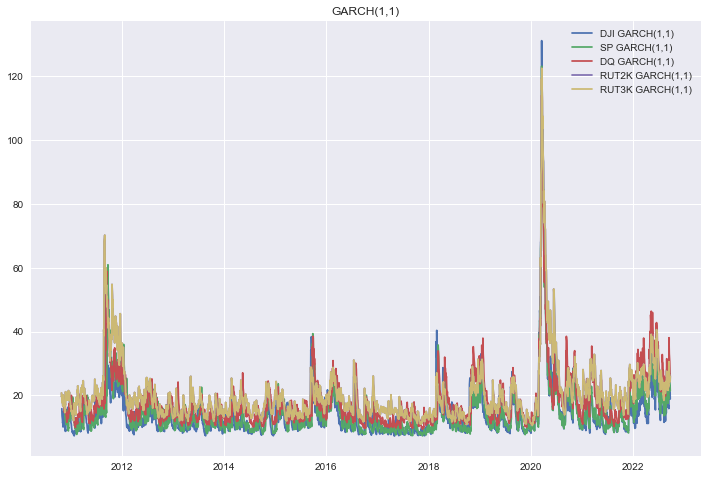

In [94]:
# plot Annualized volatilities
plt.figure(figsize=(12,8))
plt.plot(dfDJI, label='DJI GARCH(1,1)')
plt.plot(dfSPX, label='SP GARCH(1,1)')
plt.plot(dfSNQ, label='DQ GARCH(1,1)')
plt.plot(dfSRUT2K, label='RUT2K GARCH(1,1)')
plt.plot(dfSRUT3K, label='RUT3K GARCH(1,1)')
plt.legend()
plt.title('GARCH(1,1)')

# Forecasting Volatility

1. making prediction of volatility of Dow during Coronavirus pandemic 

In [95]:
# Fitting using the arch_model package
mod_garch_DJI = arch_model(volatility_df['log_return_DJI'][1:] * 100, mean = 'Constant', vol = 'GARCH', dist = "Normal")
res_garch_DJI = mod_garch_DJI.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 43733.141737529615
Iteration:      2,   Func. Count:     17,   Neg. LLF: 17165.18521957736
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6105.9705550012095
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3710.6042600752135
Iteration:      5,   Func. Count:     41,   Neg. LLF: 3958.763887647018
Iteration:      6,   Func. Count:     48,   Neg. LLF: 3665.243892682716
Iteration:      7,   Func. Count:     53,   Neg. LLF: 3665.2437899455263
Iteration:      8,   Func. Count:     58,   Neg. LLF: 3665.2437861916715
Iteration:      9,   Func. Count:     62,   Neg. LLF: 3665.243786191692
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3665.2437861916715
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9


<Figure size 1728x576 with 0 Axes>

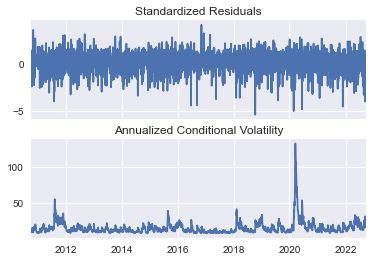

In [96]:
#plt.subplot()
plt.figure(figsize=(24,8))
model_garch_DJI.plot(annualize="D")
plt.show()

In [97]:
# horizon = how many observations we want our model to predict for each day 
# for each date, we'll get the predicted value, for the next date
# align = determines whether we match the value with the date the prediction is made on, or the one it's supposed to represent
pred_grach = res_garch_DJI.forecast(start = "2020-04-12",horizon= 1, align = 'origin')


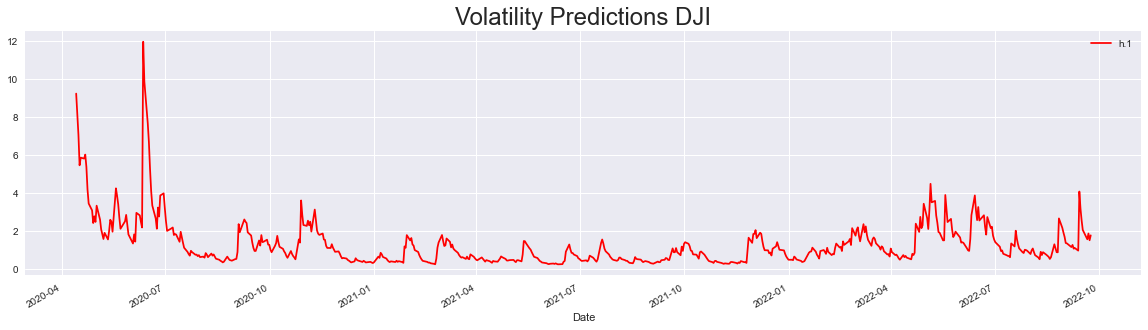

In [98]:
pred_grach.variance.plot(figsize=(20,5), color = 'red')
plt.title("Volatility Predictions DJI", size = 24)
plt.show()

2. making prediction of volatility of S&P500 during Coronavirus pandemic 

In [99]:
# Fitting using the arch_model package
mod_garch_SP = arch_model(volatility_df['log_return_SP'][1:] * 100, mean = 'Constant', vol = 'GARCH', dist = "Normal")
res_garch_SP = mod_garch_SP.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 38742.46342064915
Iteration:      2,   Func. Count:     17,   Neg. LLF: 17258.801474072574
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6174.980713653611
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3824.8849438608286
Iteration:      5,   Func. Count:     41,   Neg. LLF: 4921.095694086109
Iteration:      6,   Func. Count:     48,   Neg. LLF: 3780.3077625562155
Iteration:      7,   Func. Count:     53,   Neg. LLF: 3780.2833755448037
Iteration:      8,   Func. Count:     58,   Neg. LLF: 3780.2832601200034
Iteration:      9,   Func. Count:     63,   Neg. LLF: 3780.2832590656117
Iteration:     10,   Func. Count:     67,   Neg. LLF: 3780.283259065666
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3780.2832590656117
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10


<Figure size 1728x576 with 0 Axes>

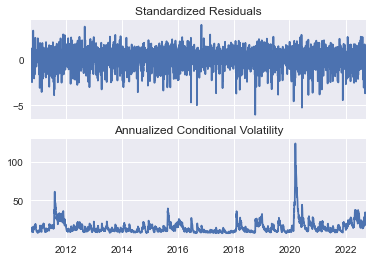

In [100]:
#plt.subplot()
plt.figure(figsize=(24,8))
model_garch_SP.plot(annualize="D")
plt.show()

In [101]:
# horizon = how many observations we want our model to predict for each day 
# for each date, we'll get the predicted value, for the next date
# align = determines whether we match the value with the date the prediction is made on, or the one it's supposed to represent
pred_grach = res_garch_SP.forecast(start = "2020-04-12",horizon= 1, align = 'origin')

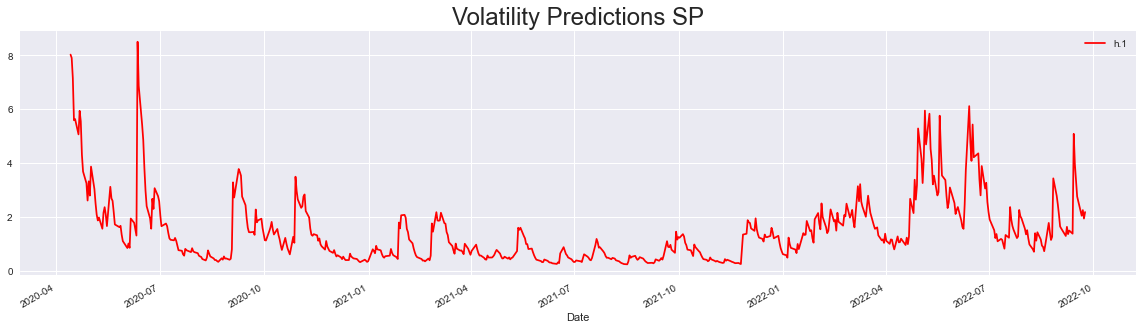

In [102]:
# plot variance of volatility
pred_grach.variance.plot(figsize=(20,5), color = 'red')
plt.title("Volatility Predictions SP", size = 24)
plt.show()

3. making prediction of volatility of NASDAQ during Coronavirus pandemic 

In [103]:
# Fitting using the arch_model package
mod_garch_NQ = arch_model(volatility_df['log_return_NQ'][1:] * 100, mean = 'Constant', vol = 'GARCH', dist = "Normal")
res_garch_NQ = mod_garch_NQ.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28677420726184.117
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1752621948.1382475
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5809.782038913765
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4846.646888881716
Iteration:      5,   Func. Count:     37,   Neg. LLF: 5665.239805628899
Iteration:      6,   Func. Count:     43,   Neg. LLF: 4396.002192634764
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4395.957736016633
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4395.953320046217
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4395.952863971092
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4395.952863970009
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4395.952863971092
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


<Figure size 1728x576 with 0 Axes>

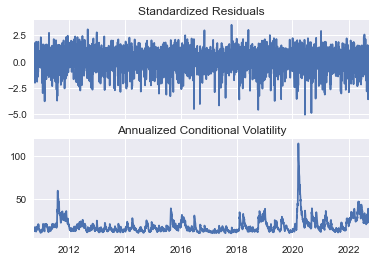

In [104]:
plt.figure(figsize=(24,8))
model_garch_NQ.plot(annualize="D")
plt.show()


In [105]:
# horizon = how many observations we want our model to predict for each day 
# for each date, we'll get the predicted value, for the next date
# align = determines whether we match the value with the date the prediction is made on, or the one it's supposed to represent
pred_grach = res_garch_NQ.forecast(start = "2020-04-12",horizon= 1, align = 'origin')

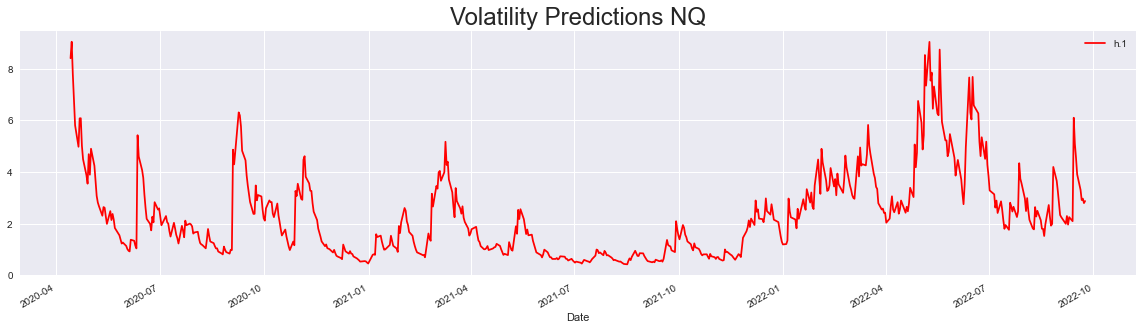

In [106]:
# plot variance of volatility
pred_grach.variance.plot(figsize=(20,5), color = 'red')
plt.title("Volatility Predictions NQ", size = 24)
plt.show()

4. making prediction of volatility of RUSSEL2000 during Coronavirus pandemic 

In [107]:
# Fitting using the arch_model package
mod_garch_RUT2K = arch_model(volatility_df['log_return_RUT2K'][1:] * 100, mean = 'Constant', vol = 'GARCH')
res_garch_RUT2K = mod_garch_RUT2K.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7204663100407.184
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2019739746.1007657
Iteration:      3,   Func. Count:     23,   Neg. LLF: 6159.837713726351
Iteration:      4,   Func. Count:     30,   Neg. LLF: 5133.520776368439
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4750.492504858677
Iteration:      6,   Func. Count:     43,   Neg. LLF: 4749.556783441003
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4749.531413536011
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4749.5308628056755
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4749.530834373894
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4749.530833730896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4749.530833730896
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


<Figure size 1728x576 with 0 Axes>

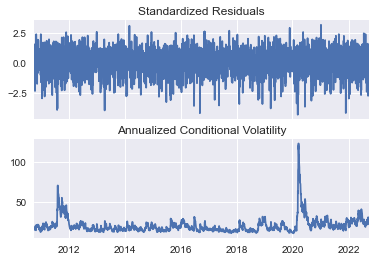

In [108]:
plt.figure(figsize=(24,8))
model_garch_RUT2K.plot(annualize="D")
plt.show()

In [109]:
# horizon = how many observations we want our model to predict for each day 
# for each date, we'll get the predicted value, for the next date
# align = determines whether we match the value with the date the prediction is made on, or the one it's supposed to represent
pred_grach = res_garch_RUT2K.forecast(start = "2020-04-12",horizon= 1, align = 'origin')

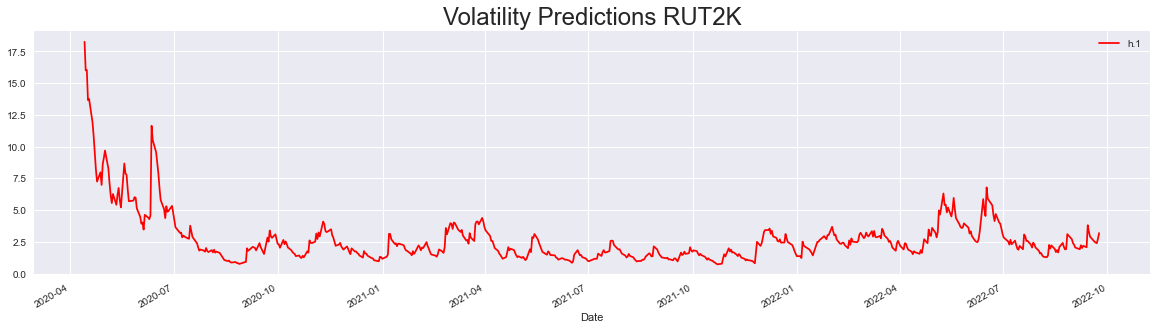

In [110]:
# plot variance of volatility
pred_grach.variance.plot(figsize=(20,5), color = 'red')
plt.title("Volatility Predictions RUT2K", size = 24)
plt.show()

5. making prediction of volatility of RUSSEL3000 during Coronavirus pandemic 

In [111]:
# Fitting using the arch_model package
mod_garch_RUT3K = arch_model(volatility_df['log_return_RUT3K'][1:] * 100, mean = 'Constant', vol = 'GARCH')
res_garch_RUT3K = mod_garch_RUT3K.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7204663100407.184
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2019739746.1007657
Iteration:      3,   Func. Count:     23,   Neg. LLF: 6159.837713726351
Iteration:      4,   Func. Count:     30,   Neg. LLF: 5133.520776368439
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4750.492504858677
Iteration:      6,   Func. Count:     43,   Neg. LLF: 4749.556783441003
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4749.531413536011
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4749.5308628056755
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4749.530834373894
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4749.530833730896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4749.530833730896
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


<Figure size 1728x576 with 0 Axes>

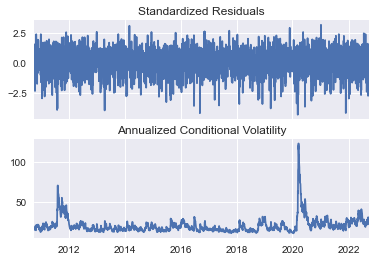

In [112]:
plt.figure(figsize=(24,8))
model_garch_RUT3K.plot(annualize="D")
plt.show()

In [113]:
# horizon = how many observations we want our model to predict for each day 
# for each date, we'll get the predicted value, for the next date
# align = determines whether we match the value with the date the prediction is made on, or the one it's supposed to represent
pred_grach = res_garch_RUT3K.forecast(start = "2020-04-12",horizon= 1, align = 'origin')

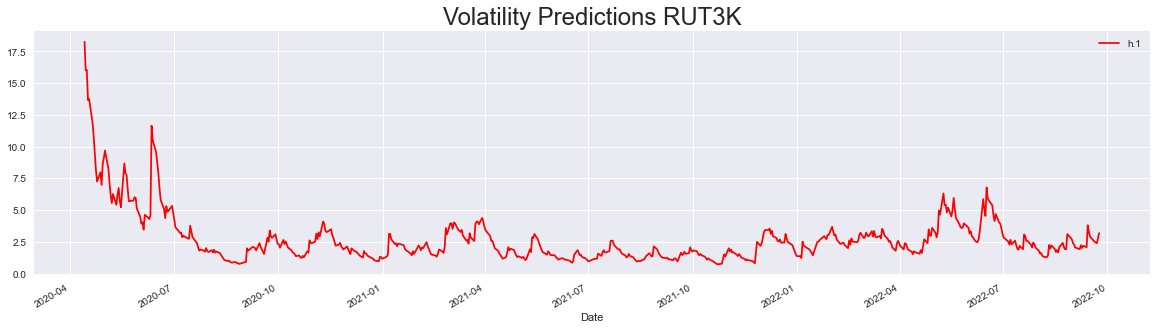

In [114]:
# plot variance of volatility
pred_grach.variance.plot(figsize=(20,5), color = 'red')
plt.title("Volatility Predictions RUT3K", size = 24)
plt.show()

# Neural Nets and Deep Learning (RRN)
## LSTM long_short term memory and time series

In [115]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)
import yfinance as yf
import datetime as dt

In [116]:
stocks = ['^DJI','^IXIC','^GSPC','^RUT','^RUA']
start = dt.datetime.today()-dt.timedelta(4370)
end = dt.datetime.today()
volatility = pd.DataFrame()
for ticker in stocks:
    volatility[ticker] = yf.download(ticker,start,end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [117]:
stocks = ['XLY','VCR','ITB','PEJ','IYC']
start = dt.datetime.today()-dt.timedelta(4370)
end = dt.datetime.today()
Cyclical = pd.DataFrame()
for ticker in stocks:
    Cyclical[ticker] = yf.download(ticker,start,end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [118]:
Volatility_Cyclical = pd.concat([volatility,Cyclical],axis=1)
Volatility_Cyclical

^DJI         ^IXIC        ^GSPC         ^RUT         ^RUA  \
Date                                                                            
2010-10-11  11010.339844   2402.330078  1165.319946   693.479980   689.080017   
2010-10-12  11020.400391   2417.919922  1169.770020   696.039978   691.760010   
2010-10-13  11096.080078   2441.229980  1178.099976   706.469971   697.150024   
2010-10-14  11094.570312   2435.379883  1173.810059   704.690002   694.619995   
2010-10-15  11062.780273   2468.770020  1176.189941   703.159973   695.849976   
...                  ...           ...          ...          ...          ...   
2022-09-20  30706.230469  11425.049805  3855.929932  1787.500000  2234.469971   
2022-09-21  30183.779297  11220.190430  3789.929932  1762.160034  2196.870117   
2022-09-22  30076.679688  11066.809570  3757.989990  1722.310059  2172.790039   
2022-09-23  29590.410156  10867.929688  3693.229980  1679.589966  2133.669922   
2022-09-26  29260.810547  10802.919922  3655.040039  1655.880005  2109.750000   

                   XLY         VCR        ITB        PEJ        IYC  
Date                                                                 
2010-10-11   34.369999   55.330002  11.890000  16.870001  15.587500  
2010-10-12   34.450001   55.500000  11.880000  16.990000  15.602500  
2010-10-13   34.500000   55.650002  11.910000  17.080000  15.657500  
2010-10-14   34.459999   55.410000  11.820000  17.040001  15.592500  
2010-10-15   34.709999   55.730000  11.660000  17.100000  15.700000  
...                ...         ...        ...        ...        ...  
2022-09-20  157.130005  258.519989  54.419998  38.790001  63.639999  
2022-09-21  153.410004  252.770004  53.750000  37.189999  62.310001  
2022-09-22  149.869995  246.479996  53.090000  36.130001  60.849998  
2022-09-23  146.419998  241.059998  53.169998  35.250000  59.549999  
2022-09-26  146.089996  240.259995  51.430000  34.599998  59.230000  

[3011 rows x 10 columns]

In [119]:
#volatility_df.fillna(np.nan,inplace=True)
Volatility_Cyclical.dropna(inplace=True)

In [120]:
Volatility_Cyclical.isna().sum()

^DJI     0
^IXIC    0
^GSPC    0
^RUT     0
^RUA     0
XLY      0
VCR      0
ITB      0
PEJ      0
IYC      0
dtype: int64

In [121]:
Volatility_Cyclical.to_csv("df_Volatility_Cyclical.csv")

In [122]:
#Std_indices = volatility_df[["std_DJI","std_SP","std_NQ","std_RUT2K","std_RUT3K"]]

In [123]:
#ETF_Consumer_Cyclical_df[["return_ITB","return_IYC","return_PEJ","return_VCR","return_XLY"]]

In [124]:
df_Volatility_Cyclical =pd.read_csv("df_Volatility_Cyclical.csv",
           infer_datetime_format=True,
           parse_dates=True,
           index_col="Date")

In [125]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    
    for x in range(len(df) - window):
        # range of rows      # range of columns
        feature = df.iloc[:(x+window), feature_col_number]
        # in this case there is no range 
        target = df.iloc[(x+window),target_col_number]
        X.append(feature)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1,1)

In [126]:
arr = df_Volatility_Cyclical.values
arr

array([[1.10103398e+04, 2.40233008e+03, 1.16531995e+03, ...,
        1.18900003e+01, 1.68700008e+01, 1.55874996e+01],
       [1.10204004e+04, 2.41791992e+03, 1.16977002e+03, ...,
        1.18800001e+01, 1.69899998e+01, 1.56025000e+01],
       [1.10960801e+04, 2.44122998e+03, 1.17809998e+03, ...,
        1.19099998e+01, 1.70799999e+01, 1.56575003e+01],
       ...,
       [3.00766797e+04, 1.10668096e+04, 3.75798999e+03, ...,
        5.30900002e+01, 3.61300011e+01, 6.08499985e+01],
       [2.95904102e+04, 1.08679297e+04, 3.69322998e+03, ...,
        5.31699982e+01, 3.52500000e+01, 5.95499992e+01],
       [2.92608105e+04, 1.08029199e+04, 3.65504004e+03, ...,
        5.14300003e+01, 3.45999985e+01, 5.92299995e+01]])

In [127]:
window = 10 # 10 days
feature_column = 5 #DJI_Close
target_column = 5 #return_ITB
X,y = window_data(df_Volatility_Cyclical,window,feature_column,target_column)

In [128]:
# times series not allowed to be shuffled 
X = arr

In [129]:
split = int(0.7 * len(X))
X_train =X[:split]
X_test = X[split:]

y_train =y[:split]
y_test = y[split:]

In [130]:
df_Volatility_Cyclical.describe()

^DJI         ^IXIC        ^GSPC         ^RUT         ^RUA  \
count   2982.000000   2982.000000  2982.000000  2982.000000  2982.000000   
mean   21119.896534   6638.710998  2447.345224  1336.998069  1446.602448   
std     7201.822807   3671.031994   955.279830   429.778896   559.375958   
min    10655.299805   2335.830078  1099.229980   609.489990   644.450012   
25%    15468.375000   3770.654907  1697.509979  1039.227509  1019.822510   
50%    18349.860352   5224.235107  2163.704956  1248.315002  1279.155029   
75%    26287.336914   8115.737549  2931.725037  1574.977478  1726.284973   
max    36799.648438  16057.440430  4796.560059  2442.739990  2804.929932   

               XLY          VCR          ITB          PEJ          IYC  
count  2982.000000  2982.000000  2982.000000  2982.000000  2982.000000  
mean     93.421445   150.506428    33.884856    35.218595    41.636046  
std      44.279223    75.430576    17.065060     9.515796    18.305603  
min      33.840000    53.860001     8.450000    15.530000    15.462500  
25%      60.635001    98.632498    23.005000    29.255000    27.551250  
50%      80.975002   127.300003    28.090000    36.360001    37.137501  
75%     119.087498   180.027500    42.240002    42.650002    53.871875  
max     211.419998   355.630005    83.040001    54.779999    86.980003

In [131]:
from sklearn.preprocessing import MinMaxScaler
# scale X 
scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# scale y because it's time series
scaler.fit(y)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [133]:
# LSTM API from keras needs to recieve features as a vertical vector, therefore we need to reshape the x
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1],1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1],1)

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [135]:
model = Sequential()
# hidden layer 1 of LSTM                                      # get  second columns 
model.add(LSTM(units= window, return_sequences=True, input_shape =(X_train_scaled.shape[1],1)   ))
# each epochs drop 20% randomly to simplify the model 
model.add(Dropout(0.2))
# hidden layer 2 of LSTM
model.add(LSTM(units= window, return_sequences=True    ))
# each epochs drop 20% randomly to simplify the model 
model.add(Dropout(0.2))
# hidden layer 3 of LSTM
model.add(LSTM(units= window, return_sequences=False    ))
# each epochs drop 20% randomly to simplify the model 
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            480       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 10)            840       
                                                                 
 dropout_1 (Dropout)         (None, 10, 10)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [137]:
# LSTM-RNNs long short-term memory
    # one solution to RNNs' short term memory problem mention above
    # works just like original RNN
    # it selects which types of longer-term events worth remembering, and which to forget.
    # which in return gives us a longer time window ot work with.
    # LSTMs are capable of learning long-term dependencies using a mechanism called gates.
        # https://transformer.huggingface.co/
            # go to the link, select one, and type in something and then click on "Trigger Autocomplete"
                # automatically creates some text suggestions based on the sequence of the previous words and the knowledge from its corpus
    # Auto-text generators typically use neural networks to predict the next logical word or phrase to an initial text.
    # Predictions are possible after training the models with thousands of corpus, which usually rely on different knowledge areas.
# dropout
    # removing units from hidden layers by randomly selecting and setting their output to zero, regardless of input.
    # different subset of units is randomly selected every time we feed a training example.
    # Dropout layer refers to a regularization technique for reducing overfitting

In [138]:
# time series is continues target, regression metric
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [139]:
model.fit(X_train_scaled, y_train_scaled, epochs = 10, shuffle=False, batch_size = 100, verbose = 1)

Epoch 1/10
21/21 [==============================] - 6s 10ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 2/10
21/21 [==============================] - 0s 9ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 4/10
21/21 [==============================] - 0s 10ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 5/10
21/21 [==============================] - 0s 9ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 6/10
21/21 [==============================] - 0s 10ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 7/10
21/21 [==============================] - 0s 8ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 8/10
21/21 [==============================] - 0s 8ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 9/10
21/21 [==============================] - 0s 8ms/step - loss: 2.4035e-08 - accuracy: 4.7916e-04
Epoch 10/10
21/21 [=======================

In [140]:
# RNN recurrent neural networks
    # RNNs ara able to remember the past, and their decisions are influenced by what learned in the past
        # thanks to their feedback loop, which allows information to flow fron one step to the next along the sequence
    # RNNS have sequential memory, which means they can work with sequential data
        # therefore, RNNs can predict the direction of a price or a movement or a sentence sequence
    # RNNs only remember the most recent few steps
        # so, it has a short term memory
            # vanishing gradient
    # used for:
        # NLP
        # DNA sequences
        # time series
        # music composition
    # RNN cheatsheet

In [141]:
model.evaluate(X_test_scaled[:-10], y_test_scaled)

28/28 [==============================] - 1s 3ms/step - loss: 7.8085e-08 - accuracy: 0.0000e+00


[7.808542079601466e-08, 0.0]

In [142]:
y_pred_lstm = model.predict(X_test_scaled)

28/28 [==============================] - 1s 3ms/step


In [143]:
y_pred_lstm_in_prices = scaler.inverse_transform(y_pred_lstm)

In [144]:
y_true_in_prices = scaler.inverse_transform(y_test_scaled).reshape(-1,1)

In [145]:
df_Volatility_Cyclical = df_Volatility_Cyclical.fillna(0)

In [146]:
stock_output = pd.DataFrame({
    "Real": y_true_in_prices.ravel(),
    "Predictions": y_pred_lstm_in_prices[:-10].ravel()
}
, index = df_Volatility_Cyclical.index[-len(y_true_in_prices):]
) 



In [147]:
stock_output

Real  Predictions
Date                               
2019-02-15  110.059998    39.528973
2019-02-19  110.510002    39.587486
2019-02-20  110.730003    39.640678
2019-02-21  110.510002    39.605747
2019-02-22  111.110001    39.548237
...                ...          ...
2022-09-20  157.130005    42.344746
2022-09-21  153.410004    42.586727
2022-09-22  149.869995    42.658955
2022-09-23  146.419998    42.858017
2022-09-26  146.089996    42.981060

[885 rows x 2 columns]

<AxesSubplot:xlabel='Date'>

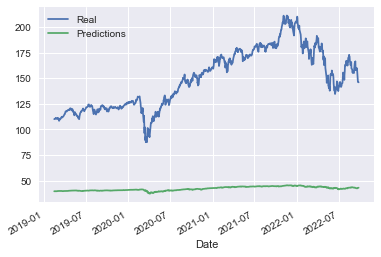

In [148]:
stock_output.plot()

# DB Scan Classifier 